In [1]:
import nltk
import numpy as np

In [2]:
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from bs4 import BeautifulSoup

In [3]:
wordnet_lemmatizer = WordNetLemmatizer()

In [4]:
stopwords = set(w.strip() for w in open('C:/Users/Ramachandran/Desktop/DSE/NLP/stopwords.txt'))

In [5]:
positive_reviews = BeautifulSoup(open('C:/Users/Ramachandran/Desktop/DSE/NLP/positive_reviews.txt').read())
positive_reviews = positive_reviews.findAll('review_text')
negative_reviews = BeautifulSoup(open('C:/Users/Ramachandran/Desktop/DSE/NLP/negative_reviews.txt').read())
negative_reviews = negative_reviews.findAll('review_text')

In [6]:
np.random.shuffle(positive_reviews)
positive_reviews = positive_reviews[:len(negative_reviews)]

In [7]:
def my_tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    return tokens

In [8]:
word_index_map = {}
current_index = 0

positive_tokenized = []
negative_tokenized = []

In [9]:
for review in positive_reviews:
    tokens = my_tokenizer(review.text)
    positive_tokenized.append(tokens)
    for token in tokens:
        if token not in word_index_map:
            word_index_map[token] = current_index
            current_index += 1            

In [10]:
for review in negative_reviews:
    tokens = my_tokenizer(review.text)
    negative_tokenized.append(tokens)
    for token in tokens:
        if token not in word_index_map:
            word_index_map[token] = current_index
            current_index += 1

In [11]:
def tokens_to_vector(tokens, label):
    x = np.zeros(len(word_index_map)+1)
    for t in tokens:
        i = word_index_map[t]
        x[i] += 1
    x = x / x.sum()
    x[-1] = label
    return x

N = len(positive_tokenized) + len(negative_tokenized)

In [15]:
data = np.zeros((N, len(word_index_map) + 1))
i = 0 

In [16]:
for tokens in positive_tokenized:
    xy = tokens_to_vector(tokens, 1)
    data[i,:] = xy
    i += 1
    
for tokens in negative_tokenized:
    xy = tokens_to_vector(tokens, 0)
    data[i,:] = xy
    i += 1

In [17]:
np.random.shuffle(data)

In [18]:
X = data[:, :-1]
y = data[:, -1]

X_train = X[:-100,]
y_train = y[:-100,]
X_test = X[-100:,]
y_test = y[-100:,]

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)
print("Classification Rate", model.score(X_test, y_test))

C:\Users\Ramachandran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification Rate 0.78


In [32]:
threshold = 0.75
positive = []

print("Positive sentiment \n \n")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        positive.append(word)
        print(word,weight)

Positive sentiment 
 

quality 1.6213432852758485
lot 0.7670472207111355
little 0.8689351015638422
sound 1.0674260208269264
perfect 1.0953619763833342
easy 1.7653122924541875
highly 1.0161862150862842
speaker 0.8776837486290554
price 2.8189906090704273
using 0.7539381478091817
excellent 1.3338175296218167
pretty 0.8130418084061394
love 1.1271016437416017
fast 0.9362200486140918
memory 1.0096253978956842


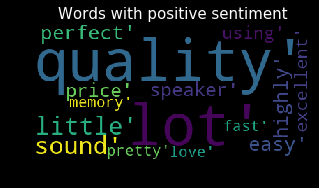

In [33]:
wc=WordCloud()
wc.generate(str(positive))
plt.figure(figsize=(5,5),facecolor='k')
plt.title('Words with positive sentiment',fontsize=15,color='white')
plt.imshow(wc)
plt.show()

In [21]:
negative = []

print("Negative sentiment \n \n")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < - threshold:
        negative.append(word)
        print(word,weight)

Negative sentiment 
 

month -0.8507700384937685
support -0.8930469613607926
week -0.7930585342029931
time -0.7565554687561046
tried -1.062823195729974
poor -0.809624439064346
money -0.918866089197569
item -1.1181737821988584
returned -0.9024941723600505
customer -0.7874938830251872
bad -0.8088011470120926
try -0.7960112589752849
return -1.3404476106871326
waste -1.1603173952115091


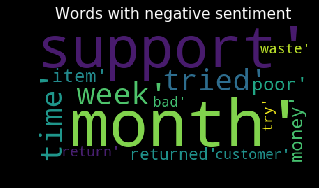

In [30]:
import matplotlib.pyplot as plt

wc=WordCloud()
wc.generate(str(negative))
plt.figure(figsize=(5,5),facecolor='k')
plt.title('Words with negative sentiment',fontsize=15,color='white')
plt.imshow(wc)
plt.show()